In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
def GenerateRandomWalkSequence(NodesCount = 7):
    pos = int((NodesCount - 1)/2)
    
    r = [pos]
    while(1):
        if(random.random() > 0.5):
            nextwalk = 1
        else:
            nextwalk = -1
        
        pos = pos + nextwalk
        if(pos == NodesCount-1):
            z = 1
            break
        elif(pos == 0):
            z = 0
            break
        else:
            r = r + [pos]

    return r , z

In [78]:
def PredictionRandomWalk():
    alpha = 0.2
    nStates = 7
    nTrainingSets = 100
    nSequences = 10
    lambdas = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
    
    optValues = np.arange(1,(nStates - 1))/(nStates - 1)
    #print('TrueValues=', optValues)
    totalRMS  = np.zeros((len(lambdas),1))
    
    for ti in range(nTrainingSets):
        trainingSet = []
        
        for si in range(nSequences):
            [r,z] = GenerateRandomWalkSequence(NodesCount=nStates)
            trainingSet.append([r,z])
        
        for li in range(len(lambdas)):
            w = 0.5 * np.ones((nStates,1))
            w[ 0] = 0 
            w[-1] = 1
            #print('initial w = ',w)
            for si in range(nSequences):
                curSeq = trainingSet[si]
                z = curSeq[1]
                #print('z',z)
                curSeq = curSeq[0]
                #print(curSeq)
                w = TDLambda(nStates, curSeq, z, w, alpha, lambdas[li])
                #print('w for seq',si,'is',w)
            rmsErr = VectorRMS(np.transpose(w[1:nStates-1]) - optValues)
            #print('RMSE for lambda=',lambdas[li],'is',rmsErr)
            totalRMS[li] = totalRMS[li] + rmsErr
    
    totalRMS = totalRMS / nTrainingSets
    
    plt.figure()
    plt.plot(lambdas, totalRMS)
    plt.show()
    
    return totalRMS

In [79]:
from numpy import linalg as LA
def VectorRMS(x):
    rms = LA.norm(x)
    rms = rms/(np.sqrt(5))
    
    return rms

In [80]:
def TDLambda(NodesCount, seq, z, w0, alpha, lambda1):
    w = w0
    w2 = w.copy()
    xt = GetObservationVector(NodesCount, seq[0])
    #print('First xt',xt)
    Pt = np.matmul(np.transpose(w),xt)
    #print('First Pt=',Pt)
    S = xt.copy()
    for i in range(1,len(seq)):
        xt = GetObservationVector(NodesCount, seq[i])
        #print('xt[',i,']=',xt)
        Pt_1 = Pt.copy()
        Pt = np.matmul(np.transpose(w),xt)
        #print('Next Pt',Pt)
        dw = alpha * (Pt - Pt_1)*S
        S = xt + (lambda1 * S)
        #print('dw=',dw)
        w2 = w2 + dw
    
    dw = alpha * (z - Pt)*S
    w2 = w2 + dw
    w = w2
    
    return w

In [81]:
#TDLambda(7,[3,4,5,4,5],1,[[0],[0.5],[0.5],[0.5],[0.5],[0.5],[1]],0.2,0.1)

In [82]:
def GetObservationVector(NodesCount,i):
    xt = np.zeros((NodesCount,1))
    xt[i] = 1
    
    return xt

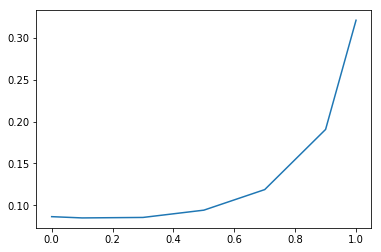

array([[0.08625136],
       [0.084746  ],
       [0.08530902],
       [0.09402643],
       [0.11863219],
       [0.19061055],
       [0.32124798]])

In [83]:
PredictionRandomWalk()